In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df_train = pd.read_csv("../data/train_users_2.csv")
df_test = pd.read_csv("../data/test_users.csv")
df_all = pd.concat([df_train, df_test])

### 1. target, id 제거

In [5]:
df_target = df_train["country_destination"]
df_id = df_test["id"]
df_all = df_all.drop("country_destination", axis = 1)
df_all = df_all.drop("id", axis = 1)

### 2. date type 컬럼 생성

In [6]:
df_all["date_account_created"] = pd.to_datetime(df_all["date_account_created"], format = "%Y-%m-%d")
df_all["timestamp_first_active"] = pd.to_datetime(df_all["timestamp_first_active"], format="%Y%m%d%H%M%S", errors='ignore')

In [7]:
df_all["ac_year"] = df_all["date_account_created"].apply(lambda x : x.year)
df_all["ac_month"] = df_all["date_account_created"].apply(lambda x : x.month)
df_all["ac_day"] = df_all["date_account_created"].apply(lambda x : x.day)

In [8]:
df_all["fa_year"] = df_all["timestamp_first_active"].apply(lambda x : x.year)
df_all["fa_month"] = df_all["timestamp_first_active"].apply(lambda x : x.month)
df_all["fa_day"] = df_all["timestamp_first_active"].apply(lambda x : x.day)
df_all["fa_hour"] = df_all["timestamp_first_active"].apply(lambda x : x.hour)
df_all["fa_minute"] = df_all["timestamp_first_active"].apply(lambda x : x.minute)
df_all["fa_second"] = df_all["timestamp_first_active"].apply(lambda x : x.second)

In [9]:
df_all = df_all.drop("date_account_created", axis = 1)
df_all = df_all.drop("timestamp_first_active", axis = 1)

### 3. delete columns

In [10]:
df_all = df_all.drop("date_first_booking", axis = 1)

In [11]:
df_all = df_all.drop("age", axis = 1)

### 4. fillna first_affiliate_tracked

In [12]:
df_all["first_affiliate_tracked"].fillna("untracked", inplace = True)

### 4. dummy variable 생성

In [13]:
df_all = pd.get_dummies(df_all)

### 5. train, test 분할

In [14]:
df_train = df_all.iloc[:213451]
df_test = df_all.iloc[213451:]

In [15]:
df_train.shape, df_test.shape

((213451, 145), (62096, 145))

### 6. 실험

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

In [17]:
y = df_target
X = df_train
X_test = df_test

In [18]:
y_bin =y.apply(lambda x : "NDF" if(x=="NDF") else "DF")

In [19]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y_bin)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [20]:
y_pre = qda.predict(X)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [22]:
print(confusion_matrix(y, y_pre))

[[     0      0      0    535      0      0      0      0      4      0
       0      0      0]
 [     0      0      0   1421      0      0      0      0      7      0
       0      0      0]
 [     0      0      0   1055      0      0      0      0      6      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0   2230      0      0      0      0     19      0
       0      0      0]
 [     0      0      0   4996      0      0      0      0     27      0
       0      0      0]
 [     0      0      0   2312      0      0      0      0     12      0
       0      0      0]
 [     0      0      0   2797      0      0      0      0     38      0
       0      0      0]
 [     0      0      0 121696      0      0      0      0   2847      0
       0      0      0]
 [     0      0      0    754      0      0      0      0      8      0
       0      0      0]
 [     0      0      0    214      0    

In [23]:
print(classification_report(y, y_pre))

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       539
         CA       0.00      0.00      0.00      1428
         DE       0.00      0.00      0.00      1061
         DF       0.00      0.00      0.00         0
         ES       0.00      0.00      0.00      2249
         FR       0.00      0.00      0.00      5023
         GB       0.00      0.00      0.00      2324
         IT       0.00      0.00      0.00      2835
        NDF       0.79      0.02      0.04    124543
         NL       0.00      0.00      0.00       762
         PT       0.00      0.00      0.00       217
         US       0.00      0.00      0.00     62376
      other       0.00      0.00      0.00     10094

avg / total       0.46      0.01      0.03    213451



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [24]:
from xgboost import XGBClassifier
from xgboost import plot_importance

### 1. multi class classification

In [25]:
xgb = XGBClassifier(n_jobs = 4)

In [26]:
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

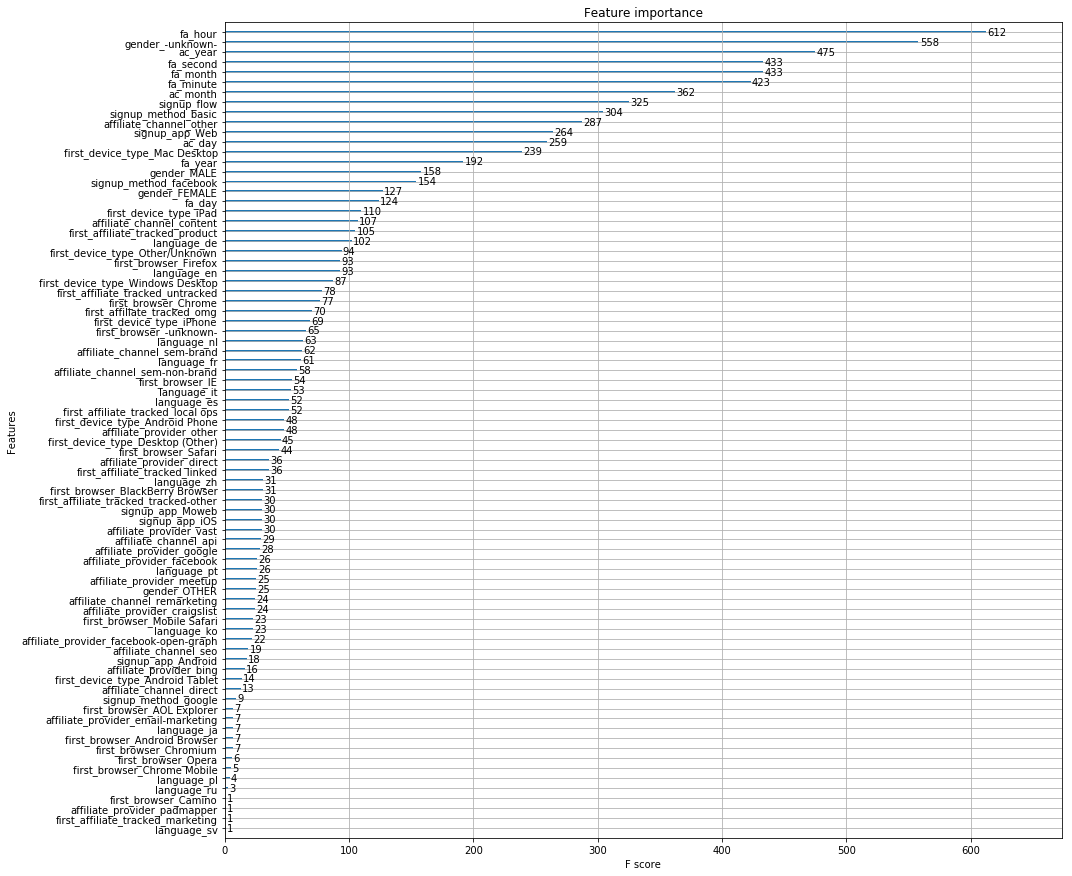

In [27]:
fig, ax = plt.subplots(figsize = (15, 15))
plot_importance(xgb, ax =ax)

In [28]:
y_pre = xgb.predict(X)

In [29]:
print(confusion_matrix(y, y_pre))

[[     0      0      0      0      0      0      0    334      0      0
     205      0]
 [     0      0      0      0      0      0      0    904      0      0
     524      0]
 [     0      0      0      0      0      0      0    689      0      0
     372      0]
 [     0      0      0      0      0      0      0   1466      0      0
     783      0]
 [     0      0      0      0      0      0      0   3261      0      0
    1762      0]
 [     0      0      0      0      0      0      0   1506      0      0
     818      0]
 [     0      0      0      0      0      0      0   1879      0      0
     956      0]
 [     0      0      0      0      0      0      0 108704      0      0
   15839      0]
 [     0      0      0      0      0      0      0    487      0      0
     275      0]
 [     0      0      0      0      0      0      0    143      0      0
      74      0]
 [     0      0      0      0      0      0      0  40827      0      0
   21549      0]
 [     0      0      

In [30]:
print(classification_report(y, y_pre))

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       539
         CA       0.00      0.00      0.00      1428
         DE       0.00      0.00      0.00      1061
         ES       0.00      0.00      0.00      2249
         FR       0.00      0.00      0.00      5023
         GB       0.00      0.00      0.00      2324
         IT       0.00      0.00      0.00      2835
        NDF       0.65      0.87      0.75    124543
         NL       0.00      0.00      0.00       762
         PT       0.00      0.00      0.00       217
         US       0.46      0.35      0.40     62376
      other       0.00      0.00      0.00     10094

avg / total       0.52      0.61      0.55    213451



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2. binary-classification

In [31]:
xgb_bin = XGBClassifier(n_jobs = 4)

In [32]:
xgb_bin.fit(X, y_bin)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

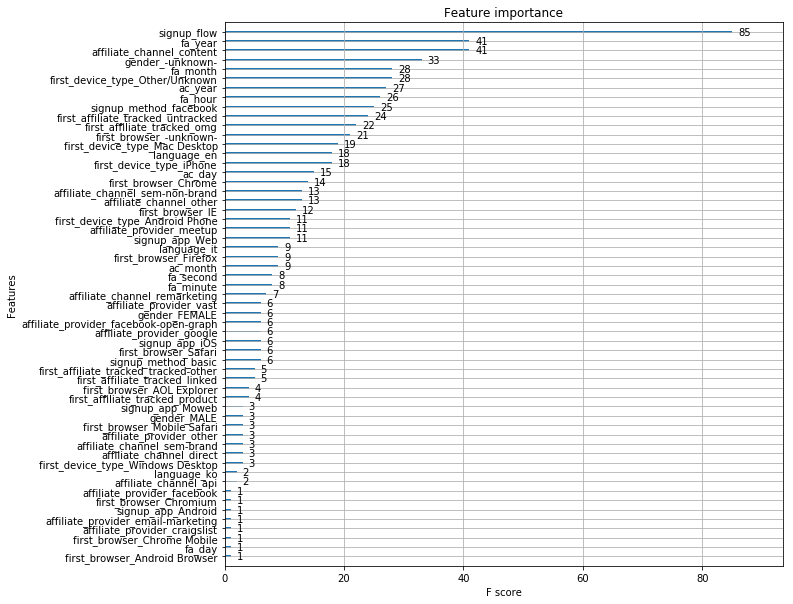

In [33]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_importance(xgb_bin, ax =ax)

In [34]:
y_pre_bin = xgb_bin.predict(X)

In [35]:
print(confusion_matrix(y_bin, y_pre_bin))

[[ 40545  48363]
 [ 23876 100667]]


In [36]:
print(classification_report(y_bin, y_pre_bin))

             precision    recall  f1-score   support

         DF       0.63      0.46      0.53     88908
        NDF       0.68      0.81      0.74    124543

avg / total       0.66      0.66      0.65    213451

